https://www.geeksforgeeks.org/automatic-license-number-plate-recognition-system/

https://github.com/arnaucampru/Automatic-License-Plate-Recognition/blob/main/codi_final.ipynb

https://pyimagesearch.com/2020/09/21/opencv-automatic-license-number-plate-recognition-anpr-with-python/

PYTESSERACT
https://www.datacamp.com/es/tutorial/optical-character-recognition-ocr-in-python-with-pytesseract


## Loading the libraries

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading the image as grayscale

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\ainav\AppData\Local\Temp\ipykernel_6684\3900559941.py:1: SyntaxWarning: invalid escape sequence '\L'
  image_path = "Test/Test\Lateral/Lateral/8727JTC.jpg"


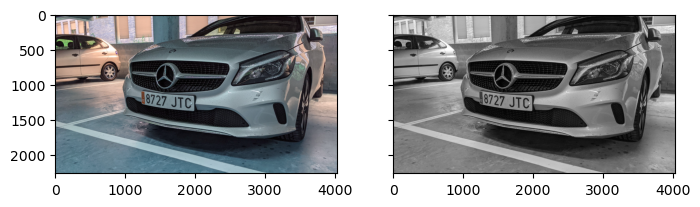

In [77]:
image_path = "Test/Test\Lateral/Lateral/8727JTC.jpg"
#image_path = "Test/Test\Frontal/Frontal/9892JFR.jpg"

im = cv2.imread(image_path)
HASAN_KARAN_TRANSFORMATION_COEFFS = [0.114, 0.587, 0.299] #Special Grayscale Transformation
m = np.array(HASAN_KARAN_TRANSFORMATION_COEFFS).reshape((1,3))
grayscale_image = cv2.transform(im, m)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(im)
ax2.imshow(grayscale_image, cmap= 'gray')

# 52 cm x 11 cm
ideal_ratio = 11/52 # 0.2115
ideal_ratio_tupla = (11, 52)

## Blurring the image

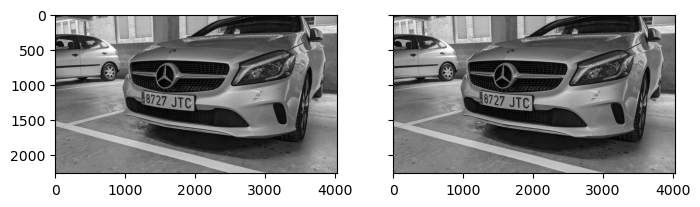

In [78]:
median_image = cv2.medianBlur(grayscale_image, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(grayscale_image, cmap= 'gray')
ax2.imshow(median_image, cmap= 'gray')

## Applying blackhat operation

Better for knowing the number on the plate

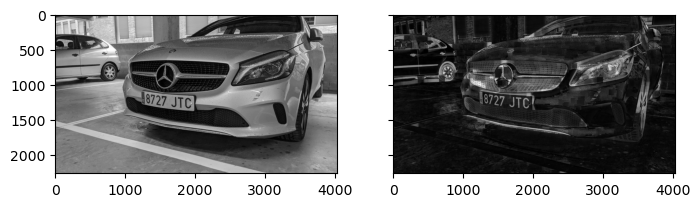

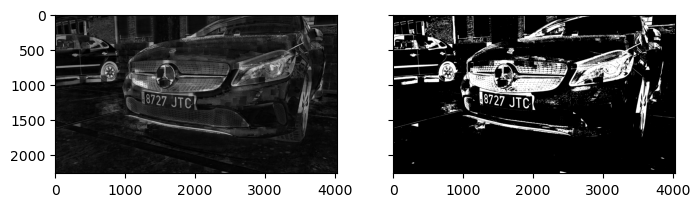

In [79]:
kernel_blackhat = cv2.getStructuringElement(cv2.MORPH_RECT, (60, 60))
blackhat_im = cv2.morphologyEx(grayscale_image, cv2.MORPH_BLACKHAT, kernel_blackhat)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(grayscale_image,  cmap = 'gray')
ax2.imshow(blackhat_im, cmap = 'gray')

ret2,binary_blackhat = cv2.threshold(blackhat_im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(blackhat_im, cmap= 'gray')
ax2.imshow(binary_blackhat, cmap= 'gray')

## Doing some operations on blackat image

## Applying whitehat operation

Better for localizing the plate

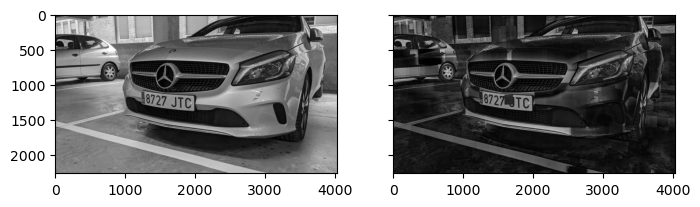

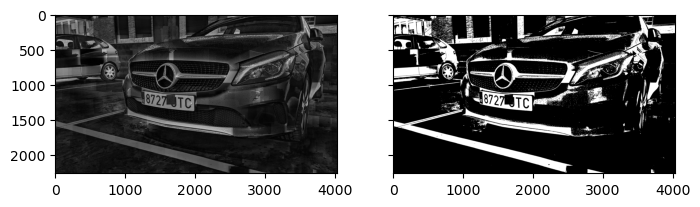

In [80]:
kernel_whitehat = cv2.getStructuringElement(cv2.MORPH_RECT, (120, 120))

whitehat_im = cv2.morphologyEx(grayscale_image, cv2.MORPH_TOPHAT, kernel_whitehat)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(grayscale_image,  cmap = 'gray')
ax2.imshow(whitehat_im, cmap = 'gray')

ret2,binary_whitehat = cv2.threshold(whitehat_im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(whitehat_im, cmap= 'gray')
ax2.imshow(binary_whitehat, cmap= 'gray')

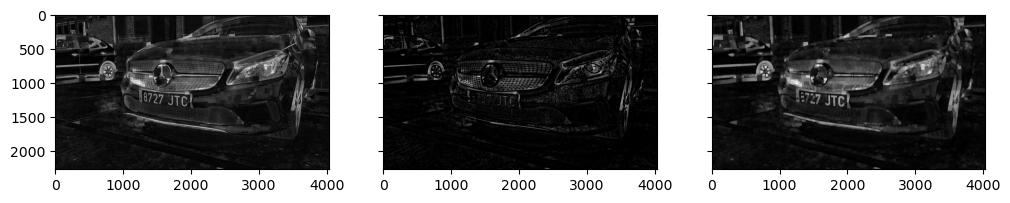

In [81]:
# Define kernel size
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply morphological operations
image_eroded = cv2.erode(blackhat_im, kernel, iterations=3)
image_dilated = cv2.dilate(image_eroded, kernel, iterations=5)

# Display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(blackhat_im, cmap= 'gray')
ax2.imshow(image_eroded, cmap= 'gray')
ax3.imshow(image_dilated, cmap= 'gray')

### operations with eroded image

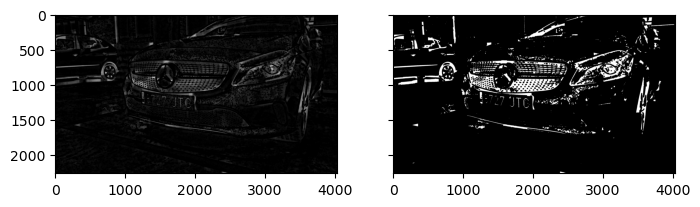

In [82]:
# BINARIZE ERODED IMAGE

ret2,binary_eroded = cv2.threshold(image_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(binary_eroded, cmap= 'gray')

### operations with dilated image

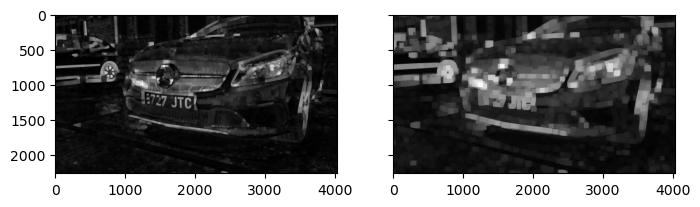

In [83]:
kernel = np.ones((5, 5), np.uint8)
super_dilated = cv2.dilate(image_dilated, kernel, iterations = 10)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 5))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(super_dilated, cmap= 'gray')

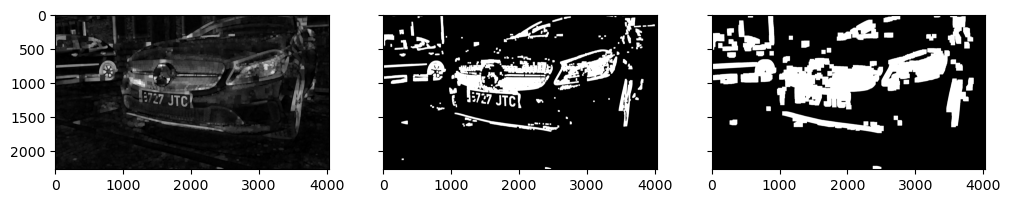

In [84]:
# BINARIZE DILATED IMAGE and SUPER-DILATED IMAGE

ret2,binary_dilated = cv2.threshold(image_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,binary_superdilated = cv2.threshold(super_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(binary_dilated, cmap= 'gray')
ax3.imshow(binary_superdilated, cmap='gray')

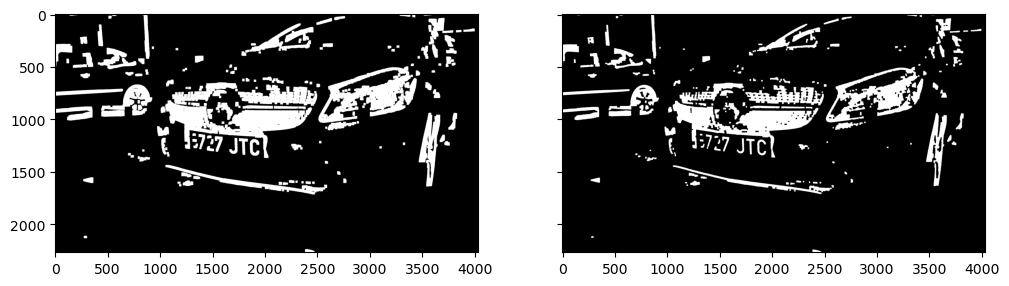

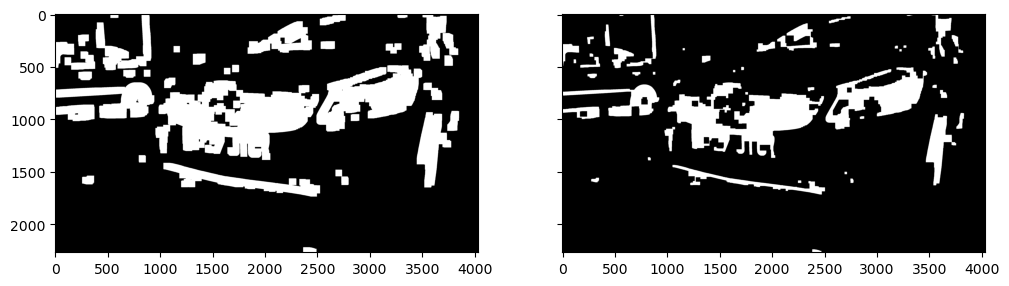

In [85]:
# trying close after erode
op1 = cv2.erode(binary_dilated, kernel, iterations = 2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_dilated, cmap= 'gray')
ax2.imshow(op1, cmap= 'gray')


op2 = cv2.erode(binary_superdilated, kernel, iterations = 10)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_superdilated, cmap= 'gray')
ax2.imshow(op2, cmap= 'gray')

## Doing some operations with whitehat image

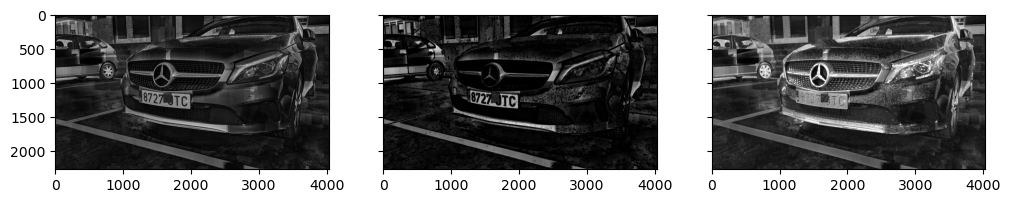

In [86]:
# Define kernel size
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply morphological operations
image_eroded = cv2.erode(whitehat_im, kernel, iterations=3)
image_dilated = cv2.dilate(whitehat_im, kernel, iterations=3)

# Display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(whitehat_im, cmap= 'gray')
ax2.imshow(image_eroded, cmap= 'gray')
ax3.imshow(image_dilated, cmap= 'gray')

### with erode

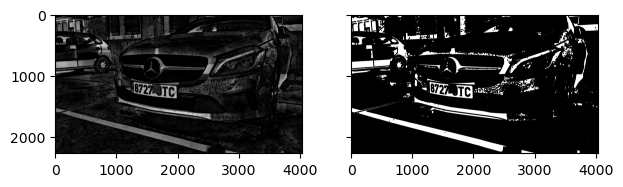

In [87]:
ret2,binary_eroded = cv2.threshold(image_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(binary_eroded, cmap= 'gray')

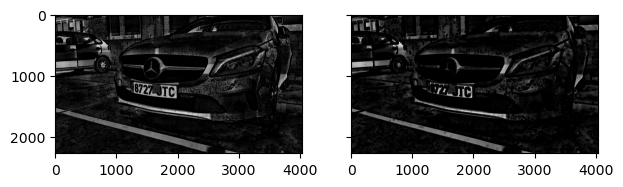

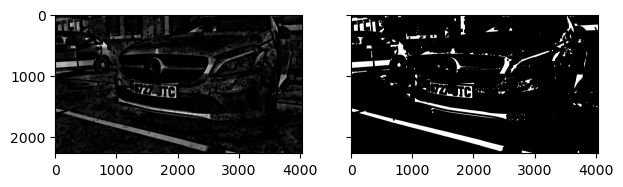

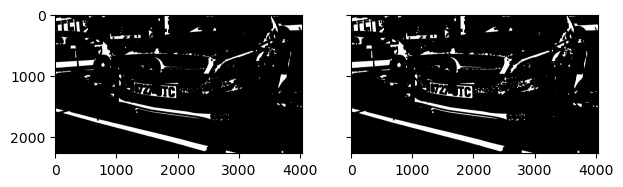

In [88]:
kernel = np.ones((5, 5), np.uint8)
super_eroded = cv2.erode(image_eroded, kernel, iterations = 3)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(super_eroded, cmap= 'gray')


ret2,binary_supereroded = cv2.threshold(super_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(super_eroded, cmap= 'gray')
ax2.imshow(binary_supereroded, cmap= 'gray')


kernel = np.ones((5, 5), np.uint8)
prova = cv2.dilate(binary_supereroded, kernel, iterations = 1)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(binary_supereroded, cmap= 'gray')
ax2.imshow(prova, cmap= 'gray')

### with dilate

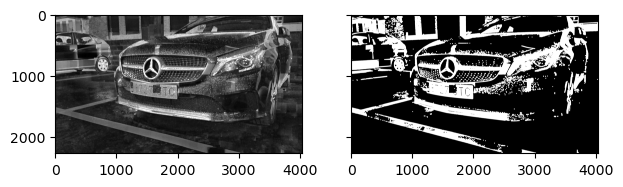

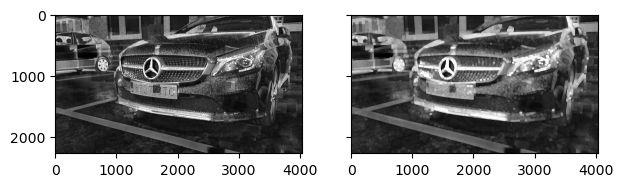

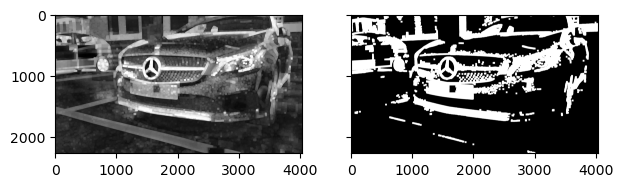

In [89]:
ret2,binary_dilated = cv2.threshold(image_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(binary_dilated, cmap= 'gray')




# CREATION OF SUPERDILATED
kernel = np.ones((5, 5), np.uint8)
super_dilated = cv2.dilate(image_dilated, kernel, iterations = 4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(super_dilated, cmap= 'gray')

ret2,binary_superdilated = cv2.threshold(super_dilated, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
ax1.imshow(super_dilated, cmap= 'gray')
ax2.imshow(binary_superdilated, cmap= 'gray')

This is with 10 iterations on erosion


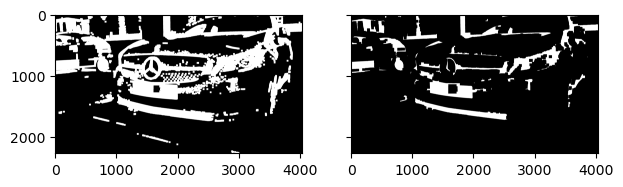

This is with 15 iterations on erosion


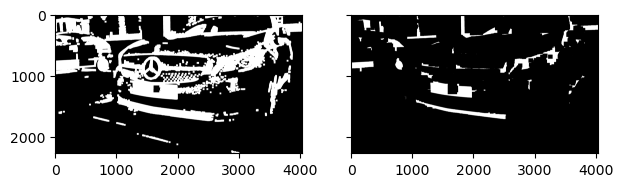

This is with 20 iterations on erosion


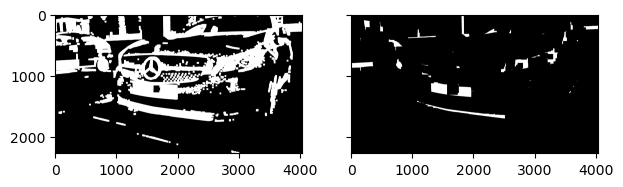

This is with 25 iterations on erosion


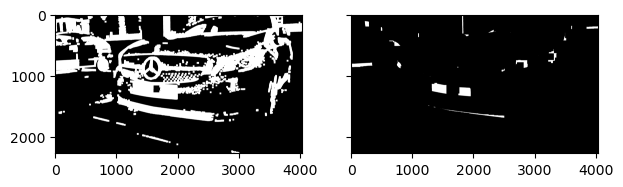

This is with 30 iterations on erosion


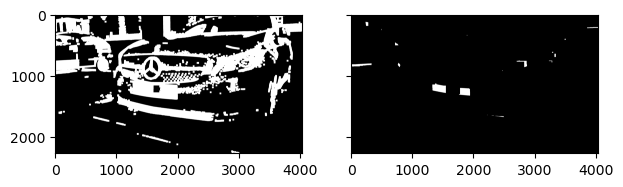

This is with 35 iterations on erosion


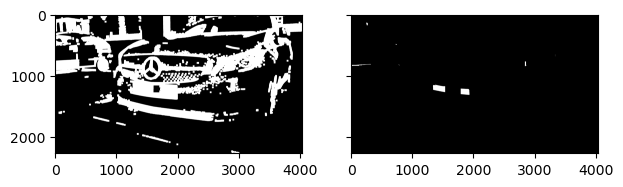

This is with 40 iterations on erosion


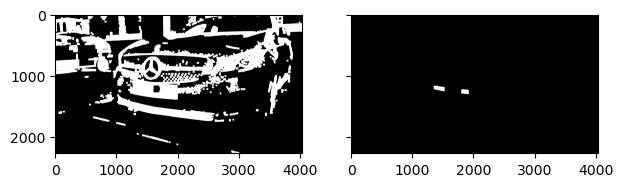

In [90]:
kernel = np.ones((5, 5), np.uint8)

for i in range(10, 45, 5):
    print(f'This is with {i} iterations on erosion')
    prova = cv2.erode(binary_superdilated, kernel, iterations = i)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    ax1.imshow(binary_superdilated, cmap= 'gray')
    ax2.imshow(prova, cmap= 'gray')
    plt.show()
    

### Extracting biggest blob superdilated image

#### With iteration = 35

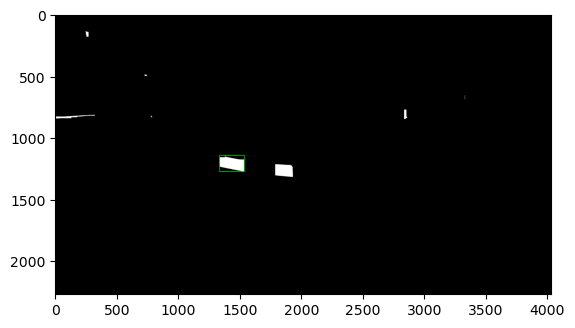

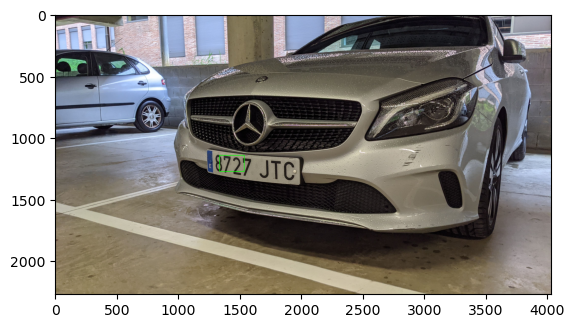

In [91]:
it35 = cv2.erode(binary_superdilated, kernel, iterations = 35)
plt.imshow(it35,cmap="gray")

contours35, _ = cv2.findContours(it35, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find image countours
largest_contour35 = max(contours35, key=cv2.contourArea) #find biggest blob according to area
x, y, w, h = cv2.boundingRect(largest_contour35) #coordinates x and y, and width and height

output_image35 = cv2.cvtColor(it35, cv2.COLOR_GRAY2BGR)  #convert to BGR for color display
cv2.rectangle(output_image35, (x, y), (x + w, y + h), (0, 255, 0), 3)  #create a green rectangle

#display the results
plt.imshow(output_image35)
plt.show()

ratio25 = h/w
if 0.15 <= ratio25 <= 0.27:
    print(ratio25)

im_copy35 = im.copy() #create a copy so the original image doesnt get affected
cv2.rectangle(im_copy35, (x, y), (x + w, y + h), (0, 255, 0), 3)  #do green rectangle

#show the result
plt.imshow(cv2.cvtColor(im_copy35, cv2.COLOR_BGR2RGB))  #convert BGR to RGB for display purposes
plt.show()

#### With iteration = 30

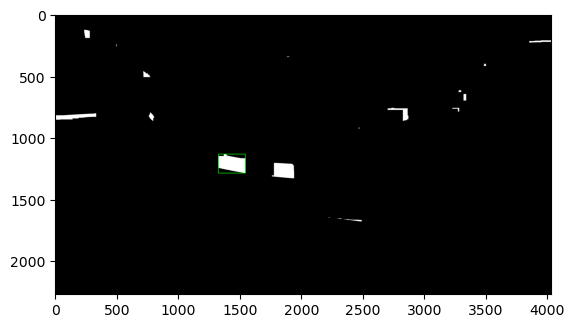

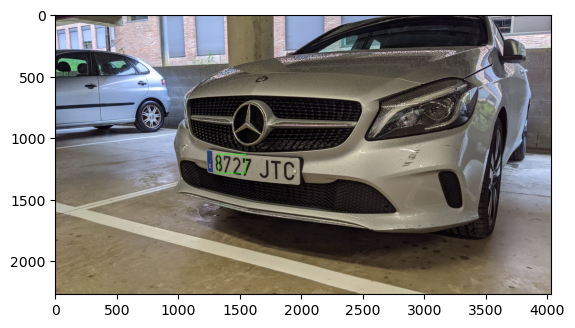

In [92]:
it30 = cv2.erode(binary_superdilated, kernel, iterations = 30)
plt.imshow(it30,cmap="gray")

contours30, _ = cv2.findContours(it30, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find image countours
largest_contour30 = max(contours30, key=cv2.contourArea) #find biggest blob according to area
x, y, w, h = cv2.boundingRect(largest_contour30) #coordinates x and y, and width and height

output_image30 = cv2.cvtColor(it30, cv2.COLOR_GRAY2BGR)  #convert to BGR for color display
cv2.rectangle(output_image30, (x, y), (x + w, y + h), (0, 255, 0), 3)  #create a green rectangle

#display the results
plt.imshow(output_image30)
plt.show()

ratio25 = h/w
if 0.15 <= ratio25 <= 0.27:
    print(ratio25)

im_copy30 = im.copy() #create a copy so the original image doesnt get affected
cv2.rectangle(im_copy30, (x, y), (x + w, y + h), (0, 255, 0), 3)  #do green rectangle

#show the result
plt.imshow(cv2.cvtColor(im_copy30, cv2.COLOR_BGR2RGB))  #convert BGR to RGB for display purposes
plt.show()

#### With iteration 25

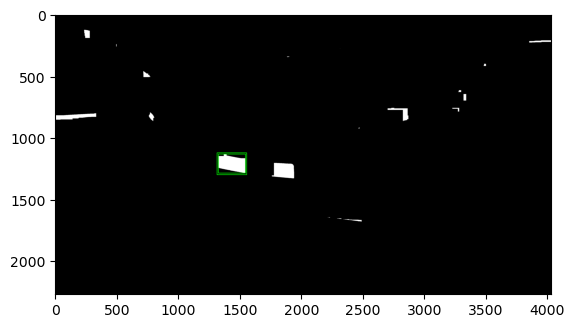

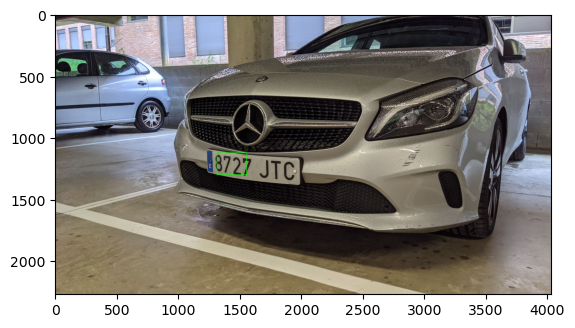

In [93]:
it25 = cv2.erode(binary_superdilated, kernel, iterations = 25)
plt.imshow(it30,cmap="gray")

contours25, _ = cv2.findContours(it25, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find image countours
largest_contour25 = max(contours25, key=cv2.contourArea) #find biggest blob according to area
x, y, w, h = cv2.boundingRect(largest_contour25) #coordinates x and y, and width and height

output_image25 = cv2.cvtColor(it25, cv2.COLOR_GRAY2BGR)  #convert to BGR for color display
cv2.rectangle(output_image30, (x, y), (x + w, y + h), (0, 255, 0), 3)  #create a green rectangle

#display the results
plt.imshow(output_image30)
plt.show()


ratio25 = h/w
if 0.15 <= ratio25 <= 0.27:
    print(ratio25)

im_copy25 = im.copy() #create a copy so the original image doesnt get affected
cv2.rectangle(im_copy25, (x, y), (x + w, y + h), (0, 255, 0), 3)  #do green rectangle

#show the result
plt.imshow(cv2.cvtColor(im_copy25, cv2.COLOR_BGR2RGB))  #convert BGR to RGB for display purposes
plt.show()

#### With iteration 20

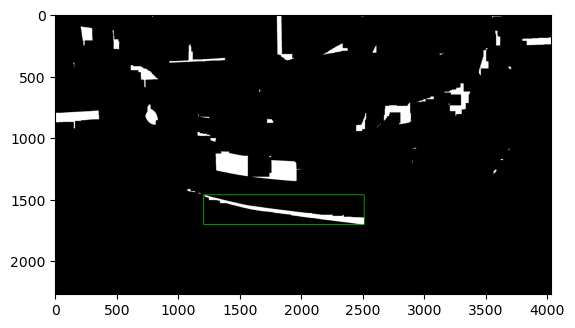

0.1839080459770115


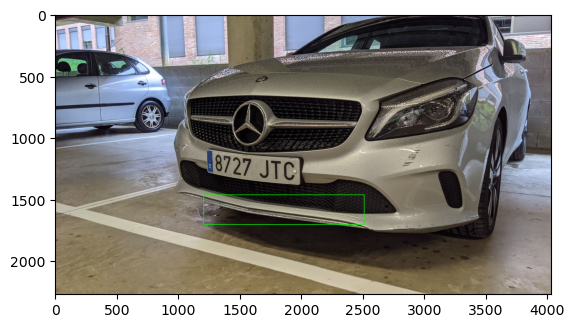

In [94]:
it20 = cv2.erode(binary_superdilated, kernel, iterations = 20)
plt.imshow(it30,cmap="gray")

contours20, _ = cv2.findContours(it20, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find image countours
largest_contour30 = max(contours20, key=cv2.contourArea) #find biggest blob according to area
x, y, w, h = cv2.boundingRect(largest_contour30) #coordinates x and y, and width and height

output_image20 = cv2.cvtColor(it20, cv2.COLOR_GRAY2BGR)  #convert to BGR for color display
cv2.rectangle(output_image20, (x, y), (x + w, y + h), (0, 255, 0), 3)  #create a green rectangle

#display the results
plt.imshow(output_image20)
plt.show()

ratio20 = h/w
if 0.15 <= ratio20 <= 0.27:
    print(ratio20)

im_copy20 = im.copy() #create a copy so the original image doesnt get affected
cv2.rectangle(im_copy20, (x, y), (x + w, y + h), (0, 255, 0), 3)  #do green rectangle

#show the result
plt.imshow(cv2.cvtColor(im_copy20, cv2.COLOR_BGR2RGB))  #convert BGR to RGB for display purposes
plt.show()

In [ ]:
iteration = [15, 20, 25, 30, 35]
for iter in iteration:
    it_im = cv2.erode(binary_superdilated, kernel, iterations = iter)
    plt.imshow(it_im,cmap="gray")

    ratio = 1
    contours, _ = cv2.findContours(it_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find image countours
    while (ratio < 0.15 or ratio > 0.27):
        largest_contour30 = max(contours, key=cv2.contourArea) #find biggest blob according to area
        x, y, w, h = cv2.boundingRect(largest_contour30) #coordinates x and y, and width and height

        ratio = h/w
        output_image20 = cv2.cvtColor(it_im, cv2.COLOR_GRAY2BGR)  #convert to BGR for color display
        cv2.rectangle(output_image20, (x, y), (x + w, y + h), (0, 255, 0), 3)  #create a green rectangle

    #display the results
    plt.imshow(output_image20)
    plt.show()

    ratio20 = h/w
    if 0.15 <= ratio20 <= 0.27:
        print(ratio20)

    im_copy20 = im.copy() #create a copy so the original image doesnt get affected
    cv2.rectangle(im_copy20, (x, y), (x + w, y + h), (0, 255, 0), 3)  #do green rectangle

    #show the result
    plt.imshow(cv2.cvtColor(im_copy20, cv2.COLOR_BGR2RGB))  #convert BGR to RGB for display purposes
    plt.show()